# Проект "Procrastinate Pro+"

Основная цель проекта - Определить причины убытков компании Procrastinate Pro+ за последние несколько месяцев и 
выработать рекомендации для улучшения показателей прибыльности и оптимизации затрат на рекламу.

# Описание данных

Данные для анализа предоставлены в формате CSV и включают в себя следующие файлы:

visits_info_short.csv - хранит лог сервера с информацией о посещениях сайта, где содержится

- User Id — уникальный идентификатор пользователя.
- Region — страна пользователя.
- Device — тип устройства пользователя.
- Channel — идентификатор источника перехода.
- Session Start — дата и время начала сессии.
- Session End — дата и время окончания сессии.

orders_info_short.csv - хранит информацию о заказах, где содержится

- User Id — уникальный идентификатор пользователя.
- Event Dt — дата и время покупки.
- Revenue — сумма заказа.

costs_info_short.csv - хранит информацию о о расходах на рекламу, где содержится

- dt — дата проведения рекламной кампании.
- Channel — идентификатор рекламного источника.
- costs — расходы на эту кампанию.

План работы состоит в следующих шагах:

- Загрузка и предварительная обработка данных:
Импорт данных из CSV-файлов.
Проверка данных на полноту и корректность.
Очистка данных от возможных ошибок и пропусков.

- Создание профилей пользователей:
Объединение данных о посещениях, заказах и затратах.
Формирование профилей пользователей с информацией о регионе, устройстве и источнике трафика.

- Анализ метрик:
Retention Rate: Подсчёт и анализ доли возвращающихся пользователей.
Конверсия: Определение доли пользователей, совершивших покупку.
LTV: Подсчёт выручки, приносимой каждым пользователем.
ROI: Оценка окупаемости затрат на привлечение пользователей.

- Визуализация данных:
Построение графиков для Retention Rate, конверсии, LTV и ROI.
Сглаживание данных для наглядности.

- Анализ результатов и выводы:
Сравнение показателей по различным рекламным каналам.
Выявление проблемных зон, требующих улучшения.
Подготовка рекомендаций по оптимизации маркетинговых затрат и стратегий.

- Заключение:
Суммирование ключевых результатов анализа.
Представление рекомендаций для повышения прибыльности компании.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

### Общая информация.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

In [14]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [15]:
visits

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [16]:
orders

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [17]:
costs

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


### Подготовка данных.

#### Приведение названий столбцов к нижнему регистру и замена пробелов на нижние подчеркивания.

In [18]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns]

In [19]:
# Преобразование строк в даты и время
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [20]:
# Преобразование числовых значений в строки (для ID пользователей)
visits['user_id'] = visits['user_id'].astype(str)
orders['user_id'] = orders['user_id'].astype(str)

In [21]:
# Проверка количества пропущенных значений
print("Пропущенные значения в visits:")
print(visits.isnull().sum())
print("\nПропущенные значения в orders:")
print(orders.isnull().sum())
print("\nПропущенные значения в costs:")
print(costs.isnull().sum())

Пропущенные значения в visits:
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Пропущенные значения в orders:
user_id     0
event_dt    0
revenue     0
dtype: int64

Пропущенные значения в costs:
dt         0
channel    0
costs      0
dtype: int64


In [22]:
# Проверка количества дубликатов
print("\nКоличество дубликатов в visits:", visits.duplicated().sum())
print("Количество дубликатов в orders:", orders.duplicated().sum())
print("Количество дубликатов в costs:", costs.duplicated().sum())


Количество дубликатов в visits: 0
Количество дубликатов в orders: 0
Количество дубликатов в costs: 0


### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [23]:
def get_profiles(sessions, orders):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # проверьте, есть ли ID пользователей из profiles в orders
    profiles['is_payer'] =  profiles.user_id.isin(orders.user_id.unique())
    

    return profiles

In [61]:
profiles

,user_id,first_ts,channel,device,region,dt,month,is_payer
0,100002830880,2019-10-17 12:25:34,organic,Android,United States,2019-10-17,2019-10-01,False
1,10000484057,2019-06-29 20:23:14,lambdaMediaAds,Mac,Germany,2019-06-29,2019-06-01,False
2,100010021210,2019-07-19 15:29:29,LeapBob,PC,UK,2019-07-19,2019-07-01,False
3,100018706745,2019-10-16 16:19:26,TipTop,Mac,United States,2019-10-16,2019-10-01,False
4,100024199374,2019-08-20 15:46:46,organic,Android,United States,2019-08-20,2019-08-01,False
...,...,...,...,...,...,...,...,...
150003,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False
150004,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False
150005,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False
150006,9999813704,2019-08-03 06:41:08,organic,PC,United States,2019-08-03,2019-08-01,False


In [25]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['is_payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id' 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [26]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [27]:
# Функция для расчета LTV
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

функции для построения графиков

In [28]:
# функция для визуализации удержания

# Функция визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):
    plt.figure(figsize=(15, 10))
    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'is_payer'])
# в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('is_payer == True').droplevel('is_payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of Paying Users')
# во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки 
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('is_payer == False').droplevel('is_payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of Non-Paying Users')
# в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    columns = [name for name in retention_history.index.names if name not in ['dt', 'is_payer']]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('is_payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
# в чётвертой ячейке — динамика удержания неплатящих 
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
# фильтруем данные и строим график    
    filtered_data = retention_history.query('is_payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition Date')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [29]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [30]:
# Функция визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [31]:
# Функция визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [62]:
# Изменение типа
costs['dt'] = pd.to_datetime(costs['dt'])
profiles['dt'] = pd.to_datetime(profiles['dt'])

costs.info()
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
 3   week     1800 non-null   datetime64[ns]
 4   month    1800 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(1)
memory usage: 70.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150008 entries, 0 to 150007
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   user_id   150008 non-null  object        
 1   first_ts  150008 non-null  datetime64[ns]
 2   channel   150008 non-null  object        
 3   device    150008 non-null  object        
 4   region    150008 non-null  object        
 5   dt        150008 non-null  datetime64[ns]
 6   month     150008

In [63]:
profiles = get_profiles(visits, orders)
profiles.sort_values(by = 'dt')
print('Минимальная дата привлечения пользователей =', profiles['dt'].min())
print('Максимальная дата привлечения пользователей =', profiles['dt'].max())

Минимальная дата привлечения пользователей = 2019-05-01
Максимальная дата привлечения пользователей = 2019-10-27


In [64]:
# Указывается значение data в виде строки

def paid_users_info(data):
    
    # Группировка по параметру data. Выявляем общее количество пользователей и долю платящих
    df1 = profiles.groupby(data).agg({'is_payer':['count', 'mean']})
    df1.columns=['all_users', 'mean_users']
    df1 = df1.reset_index(drop = False)
    
    # Высчитываем количество платящих пользователей по параметру data
    df2 = profiles.query("is_payer == True").groupby(data).agg({'is_payer':['count']})
    df2.columns=['paid_users']
    df2 = df2.reset_index(drop = False)
    
    # Объединяем таблицы
    df3 = df1.merge(df2, how = 'left', on = data)
    df3 = df3.sort_values(by = 'paid_users', ascending = False).reset_index(drop = True)
    df3['mean_users'] = (df3['mean_users'] * 100).round(2)
    
    return df3

#### Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны

In [65]:
region_paid = paid_users_info('region')
region_paid

,region,all_users,mean_users,paid_users
0,United States,100002,6.90,6902
1,UK,17575,3.98,700
2,France,17450,3.80,663
3,Germany,14981,4.11,616


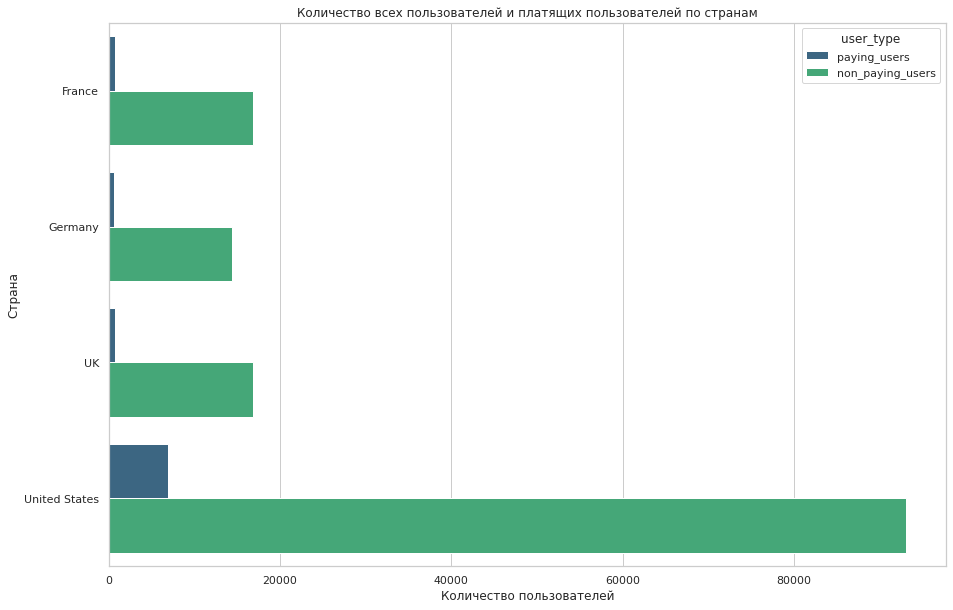

          region  total_users  paying_users  non_paying_users
0         France        17450           663             16787
1        Germany        14981           616             14365
2             UK        17575           700             16875
3  United States       100002          6902             93100


In [66]:
# Определение платящих пользователей
profiles['is_payer'] = profiles['user_id'].isin(orders['user_id'].unique())

# Подсчет количества пользователей и доли платящих для каждой страны
country_stats = profiles.groupby('region').agg({
    'user_id': 'count',
    'is_payer': 'sum'
}).reset_index()

country_stats.rename(columns={'user_id': 'total_users', 'is_payer': 'paying_users'}, inplace=True)
country_stats['non_paying_users'] = country_stats['total_users'] - country_stats['paying_users']

# Преобразование данных для построения графика
country_stats_melted = pd.melt(country_stats, id_vars=['region'], value_vars=['paying_users', 'non_paying_users'],
                               var_name='user_type', value_name='count')

# Построение графика
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.barplot(x='count', y='region', hue='user_type', data=country_stats_melted, palette='viridis')
plt.title('Количество всех пользователей и платящих пользователей по странам')
plt.xlabel('Количество пользователей')
plt.ylabel('Страна')
plt.show()

# Вывод результатов
print(country_stats)

В наше приложение входят пользователи из следующих стран: 'United States', 'UK', 'France', 'Germany'.

Наибольшее количество пользователей поступает из United States (100002), также здесь больше всего платящих пользователей (6902) с долей 6.9%.
Наименьшее количество пользователей из Germany (14981), где число платящих пользователей составляет 616, а их доля — 4.1%.

Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства

In [67]:
device_paid = paid_users_info('device')
device_paid

,device,all_users,mean_users,paid_users
0,iPhone,54479,6.21,3382
1,Android,35032,5.85,2050
2,Mac,30042,6.36,1912
3,PC,30455,5.05,1537


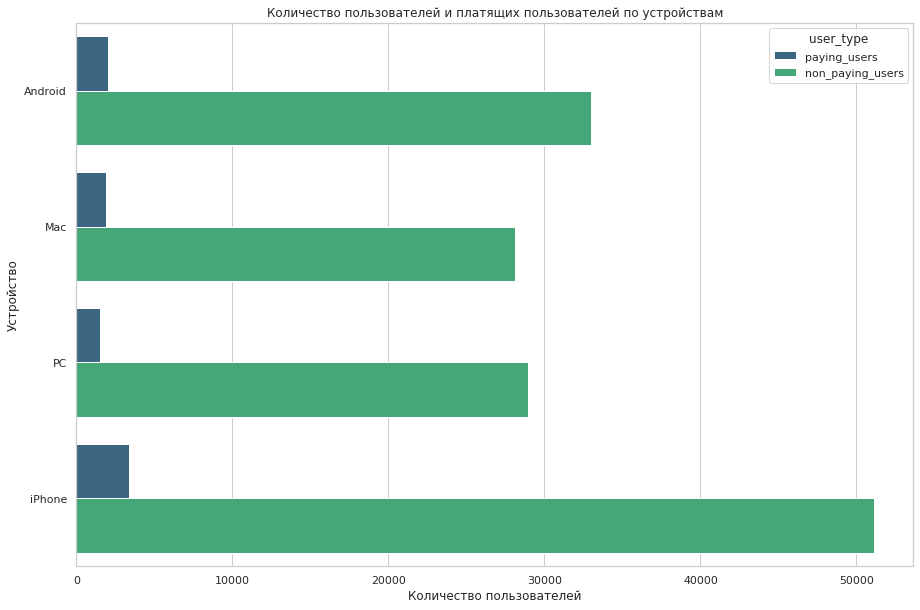

    device  total_users  paying_users  non_paying_users
0  Android        35032          2050             32982
1      Mac        30042          1912             28130
2       PC        30455          1537             28918
3   iPhone        54479          3382             51097


In [68]:
# Подсчет количества пользователей и доли платящих для каждого устройства
device_stats = profiles.groupby('device').agg({
    'user_id': 'count',
    'is_payer': 'sum'
}).reset_index()

device_stats.rename(columns={'user_id': 'total_users', 'is_payer': 'paying_users'}, inplace=True)
device_stats['non_paying_users'] = device_stats['total_users'] - device_stats['paying_users']

# Преобразование данных для построения графика
device_stats_melted = pd.melt(device_stats, id_vars=['device'], value_vars=['paying_users', 'non_paying_users'],
                              var_name='user_type', value_name='count')

# Построение графика
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.barplot(x='count', y='device', hue='user_type', data=device_stats_melted, palette='viridis')
plt.title('Количество пользователей и платящих пользователей по устройствам')
plt.xlabel('Количество пользователей')
plt.ylabel('Устройство')
plt.show()

# Вывод результатов
print(device_stats)

В наше приложение входят пользователи с различных устройств: 'iPhone', 'Android', 'Mac', 'PC'.

Наибольшее количество пользователей приходит с устройств iPhone (54479), где также наблюдается наибольшее число платящих пользователей (3382) с долей 6.2%.
Наименьшее количество пользователей использует устройства PC (30455), с числом платящих пользователей 1537 и долей 5%

#### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения

In [69]:
channel_paid = paid_users_info('channel')
channel_paid

,channel,all_users,mean_users,paid_users
0,FaceBoom,29144,12.20,3557
1,TipTop,19561,9.60,1878
2,organic,56439,2.06,1160
3,WahooNetBanner,8553,5.30,453
4,AdNonSense,3880,11.34,440
5,RocketSuperAds,4448,7.91,352
6,LeapBob,8553,3.06,262
7,OppleCreativeMedia,8605,2.71,233
8,lambdaMediaAds,2149,10.47,225
9,YRabbit,4312,3.83,165


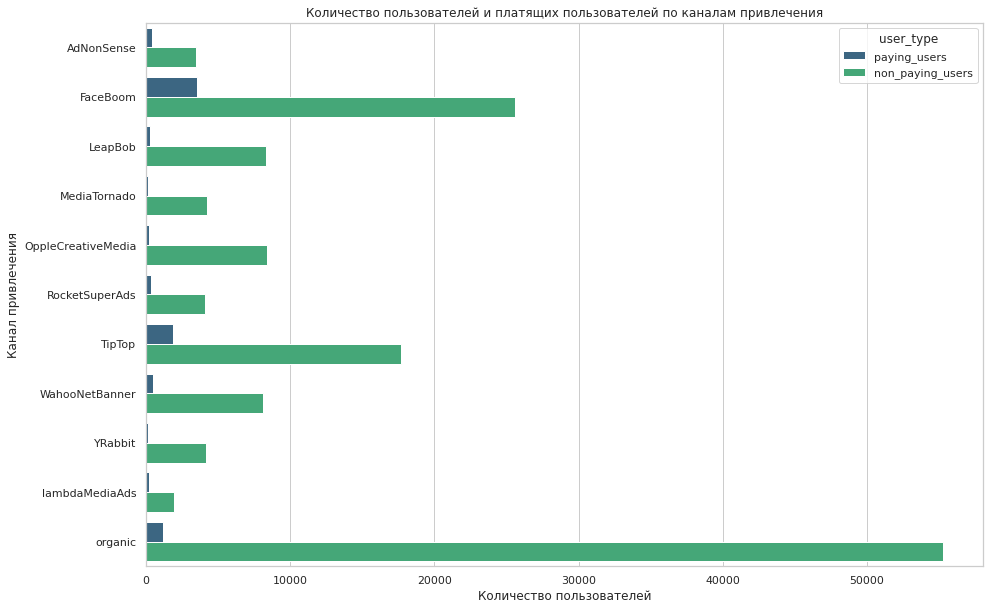

               channel  total_users  paying_users  non_paying_users
0           AdNonSense         3880           440              3440
1             FaceBoom        29144          3557             25587
2              LeapBob         8553           262              8291
3         MediaTornado         4364           156              4208
4   OppleCreativeMedia         8605           233              8372
5       RocketSuperAds         4448           352              4096
6               TipTop        19561          1878             17683
7       WahooNetBanner         8553           453              8100
8              YRabbit         4312           165              4147
9       lambdaMediaAds         2149           225              1924
10             organic        56439          1160             55279


In [70]:
# Подсчет количества пользователей и доли платящих для каждого канала привлечения
channel_stats = profiles.groupby('channel').agg({
    'user_id': 'count',
    'is_payer': 'sum'
}).reset_index()

channel_stats.rename(columns={'user_id': 'total_users', 'is_payer': 'paying_users'}, inplace=True)
channel_stats['non_paying_users'] = channel_stats['total_users'] - channel_stats['paying_users']

# Преобразование данных для построения графика
channel_stats_melted = pd.melt(channel_stats, id_vars=['channel'], value_vars=['paying_users', 'non_paying_users'],
                               var_name='user_type', value_name='count')

# Построение графика
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.barplot(x='count', y='channel', hue='user_type', data=channel_stats_melted, palette='viridis')
plt.title('Количество пользователей и платящих пользователей по каналам привлечения')
plt.xlabel('Количество пользователей')
plt.ylabel('Канал привлечения')
plt.show()

# Вывод результатов
print(channel_stats)

В наше приложение пользователи приходят из различных источников, таких как 'FaceBoom', 'TipTop', 'organic', 'WahooNetBanner', 'AdNonSense', 'RocketSuperAds', 'LeapBob', 'OppleCreativeMedia', 'lambdaMediaAds', 'YRabbit', 'MediaTornado'.

Наибольшее количество пользователей поступает из источника organic (56439), однако наибольшее число платящих пользователей (3557) приходится на источник FaceBoom, где их доля составляет 12.2% (всего пользователей из этого источника 29144). Наименьшее число пользователей поступает из источника MediaTornado (4364), с количеством платящих пользователей 156 и долей 3.5%.

#### Выводы по разделу:

Минимальная дата привлечения пользователей составляет 2019-05-01, а максимальная — 2019-10-27.

По странам:
В приложение пользователи приходят из стран 'United States', 'UK', 'France' и 'Germany'.

Наибольшее количество пользователей — из США (100002), где также наблюдается наибольшее число платящих пользователей (6902) с долей 6.9%. Наименьшее количество пользователей поступает из Германии (14981), где количество платящих пользователей составляет 616, а их доля — 4.1%.

По устройствам:
Пользователи приложения используют устройства 'iPhone', 'Android', 'Mac' и 'PC'.

Наибольшее количество пользователей — на iPhone (54479), где также наблюдается наибольшее число платящих пользователей (3382) с долей 6.2%. Наименьшее количество пользователей — на PC (30455), с 1537 платящими пользователями и долей 5%.

По источникам:
Пользователи приходят из источников 'FaceBoom', 'TipTop', 'organic', 'WahooNetBanner', 'AdNonSense', 'RocketSuperAds', 'LeapBob', 'OppleCreativeMedia', 'lambdaMediaAds', 'YRabbit' и 'MediaTornado'.

Наибольшее количество пользователей приходит из источника organic (56439), однако наибольшее число платящих пользователей (3557) — из источника FaceBoom, с долей 12.2% (всего пользователей из этого источника 29144). Наименьшее количество пользователей поступает из источника MediaTornado (4364), с 156 платящими пользователями и долей 3.5%

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Измененим типы данных и объединеним таблицы.

In [71]:
profiles['dt'] = pd.to_datetime(profiles['dt'])
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150008 entries, 0 to 150007
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   user_id   150008 non-null  object        
 1   first_ts  150008 non-null  datetime64[ns]
 2   channel   150008 non-null  object        
 3   device    150008 non-null  object        
 4   region    150008 non-null  object        
 5   dt        150008 non-null  datetime64[ns]
 6   month     150008 non-null  datetime64[ns]
 7   is_payer  150008 non-null  bool          
dtypes: bool(1), datetime64[ns](3), object(4)
memory usage: 8.2+ MB


In [72]:
profiles_costs = profiles.merge(costs, how = 'left', on = ['dt', 'channel'])
profiles_costs['week'] = profiles_costs['first_ts'].dt.isocalendar().week
profiles_costs['costs'] = profiles_costs['costs'].fillna(0)

In [73]:
# Создадим столбец с типом трафика
conditions = [
    (profiles_costs['channel'] == 'organic'),
    (profiles_costs['channel'] !='organic'),
]
choices = ['Organic', 'Paid']

profiles_costs['traffic_type'] = np.select(conditions, choices)

profiles_costs

,user_id,first_ts,channel,device,region,dt,month_x,is_payer,costs,week,month_y,traffic_type
0,100002830880,2019-10-17 12:25:34,organic,Android,United States,2019-10-17,2019-10-01,False,0.00,42,NaT,Organic
1,10000484057,2019-06-29 20:23:14,lambdaMediaAds,Mac,Germany,2019-06-29,2019-06-01,False,11.20,26,2019-06-01,Paid
2,100010021210,2019-07-19 15:29:29,LeapBob,PC,UK,2019-07-19,2019-07-01,False,8.82,29,2019-07-01,Paid
3,100018706745,2019-10-16 16:19:26,TipTop,Mac,United States,2019-10-16,2019-10-01,False,353.50,42,2019-10-01,Paid
4,100024199374,2019-08-20 15:46:46,organic,Android,United States,2019-08-20,2019-08-01,False,0.00,34,NaT,Organic
...,...,...,...,...,...,...,...,...,...,...,...,...
150003,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.00,43,NaT,Organic
150004,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,202.80,30,2019-07-01,Paid
150005,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,8.64,39,2019-09-01,Paid
150006,9999813704,2019-08-03 06:41:08,organic,PC,United States,2019-08-03,2019-08-01,False,0.00,31,NaT,Organic


In [74]:
#Расчет CAC

def profiles_cac(profiles, ad_costs):
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

Посчитайте общую сумму расходов на маркетинг.

In [75]:
print("Общая сумма расходов на маркетинг:", profiles_costs.costs.sum().round(2))

Общая сумма расходов на маркетинг: 13018376.49


#### Выясним как распределены траты по рекламны источникам

In [76]:
costs_data = costs.pivot_table(index = 'channel', values = 'costs', aggfunc = 'sum')\
           .sort_values(by='costs', ascending = False)\
            .reset_index(drop = False)

costs_data['mean'] = costs_data.costs / costs_data.costs.sum()
costs_data.style.format({'mean': '{:.2%}','costs': '{:.2f}'})

,channel,costs,mean
0,TipTop,54751.30,51.90%
1,FaceBoom,32445.60,30.75%
2,WahooNetBanner,5151.00,4.88%
3,AdNonSense,3911.25,3.71%
4,OppleCreativeMedia,2151.25,2.04%
5,RocketSuperAds,1833.00,1.74%
6,LeapBob,1797.60,1.70%
7,lambdaMediaAds,1557.60,1.48%
8,MediaTornado,954.48,0.90%
9,YRabbit,944.22,0.90%


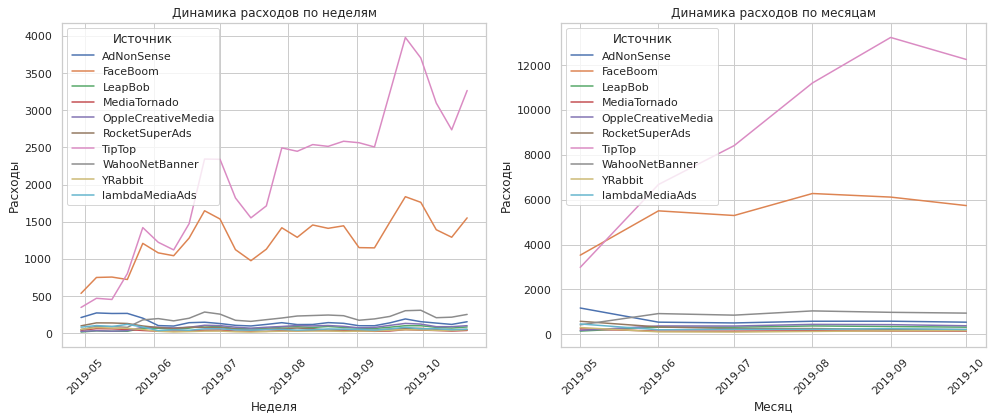

In [77]:
costs_data = costs

# Преобразование даты в недели и месяцы
costs_data['week'] = costs_data['dt'].dt.to_period('W').apply(lambda r: r.start_time)
costs_data['month'] = costs_data['dt'].dt.to_period('M').apply(lambda r: r.start_time)

# Агрегация расходов по неделям
weekly_costs = costs_data.groupby(['week', 'channel'])['costs'].sum().reset_index()

# Агрегация расходов по месяцам
monthly_costs = costs_data.groupby(['month', 'channel'])['costs'].sum().reset_index()

# Построение графиков
plt.figure(figsize=(14, 6))

# График динамики расходов по неделям
plt.subplot(1, 2, 1)
sns.lineplot(data=weekly_costs, x='week', y='costs', hue='channel')
plt.title('Динамика расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.xticks(rotation=45)
plt.legend(title='Источник')

# График динамики расходов по месяцам
plt.subplot(1, 2, 2)
sns.lineplot(data=monthly_costs, x='month', y='costs', hue='channel')
plt.title('Динамика расходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.xticks(rotation=45)
plt.legend(title='Источник')

plt.tight_layout()
plt.show()

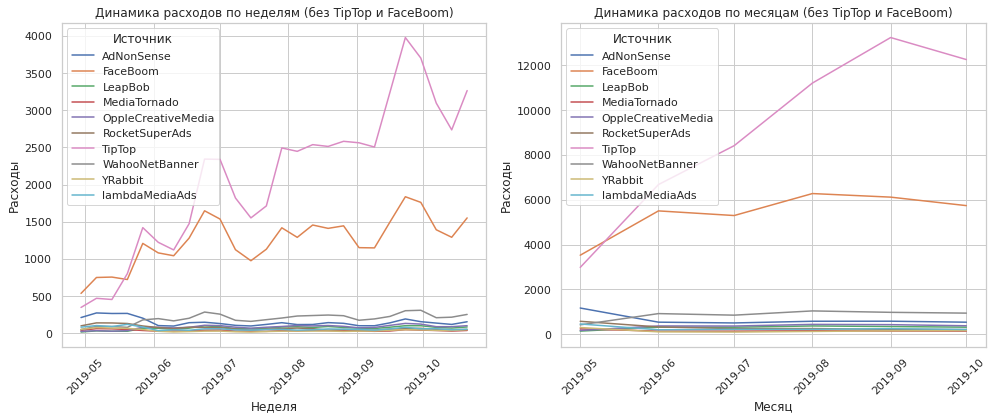

In [78]:
# Фильтрация данных, исключая 'TipTop' и 'FaceBoom'
filtered_costs_data = costs_data[~costs_data['channel'].isin(['TipTop', 'FaceBoom'])]

# Построение графиков
plt.figure(figsize=(14, 6))

# График динамики расходов по неделям
plt.subplot(1, 2, 1)
sns.lineplot(data=weekly_costs, x='week', y='costs', hue='channel')
plt.title('Динамика расходов по неделям (без TipTop и FaceBoom)')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.xticks(rotation=45)
plt.legend(title='Источник')

# График динамики расходов по месяцам
plt.subplot(1, 2, 2)
sns.lineplot(data=monthly_costs, x='month', y='costs', hue='channel')
plt.title('Динамика расходов по месяцам (без TipTop и FaceBoom)')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.xticks(rotation=45)
plt.legend(title='Источник')

plt.tight_layout()
plt.show()

Графики по неделям и месяцам показывают, что основная часть расходов приходится на источники TipTop и FaceBoom. Их затраты значительно превышают расходы на другие источники, что подтверждают как графики, так и таблица расходов за весь период. Анализ графиков также показывает, что расходы на TipTop и FaceBoom постоянно растут по сравнению с другими источниками

#### Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей

In [79]:
profiles_with_cac = profiles_cac(profiles_costs, costs)
profiles_with_cac.head(5)

,user_id,first_ts,channel,device,region,dt,month_x,is_payer,costs,week,month_y,traffic_type,acquisition_cost
0,100002830880,2019-10-17 12:25:34,organic,Android,United States,2019-10-17,2019-10-01,False,0.00,42,NaT,Organic,0.000000
1,10000484057,2019-06-29 20:23:14,lambdaMediaAds,Mac,Germany,2019-06-29,2019-06-01,False,11.20,26,2019-06-01,Paid,0.700000
2,100010021210,2019-07-19 15:29:29,LeapBob,PC,UK,2019-07-19,2019-07-01,False,8.82,29,2019-07-01,Paid,0.215122
3,100018706745,2019-10-16 16:19:26,TipTop,Mac,United States,2019-10-16,2019-10-01,False,353.50,42,2019-10-01,Paid,3.500000
4,100024199374,2019-08-20 15:46:46,organic,Android,United States,2019-08-20,2019-08-01,False,0.00,34,NaT,Organic,0.000000


In [80]:
profiles_with_cac.pivot_table(index = 'channel', values = 'acquisition_cost', aggfunc = 'mean')\
                .sort_values(by = 'acquisition_cost', ascending = False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


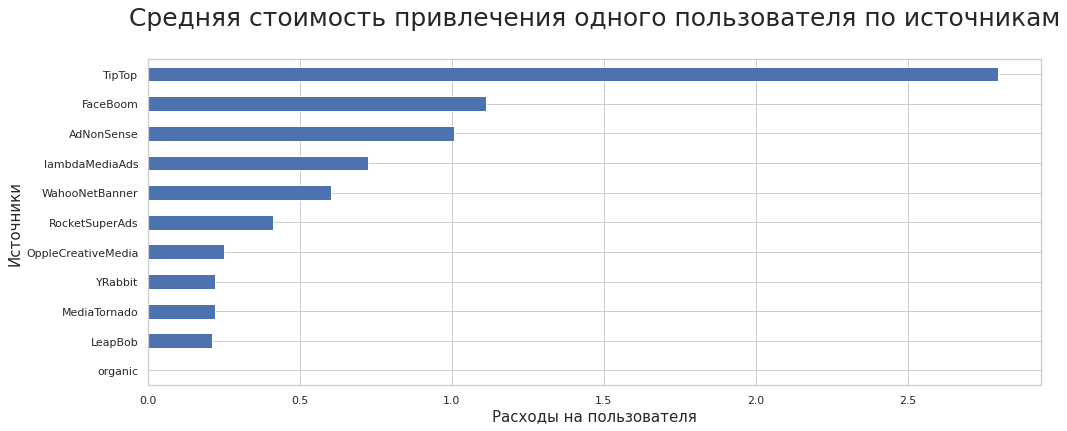

In [81]:
profiles_with_cac.pivot_table(index = 'channel', values = 'acquisition_cost', aggfunc = 'mean')\
                .sort_values(by = 'acquisition_cost', ascending = True)\
                .plot(kind = 'barh', figsize = (16,6), legend = False)

plt.title("Средняя стоимость привлечения одного пользователя по источникам\n", fontsize = 25)
plt.ylabel('Источники', fontsize = 15)
plt.xlabel('Расходы на пользователя', fontsize = 15)
plt.show()

На графиках по неделям и месяцам видно, что основная часть расходов приходится на источники TipTop и FaceBoom. Расходы по этим источникам значительно превышают затраты на другие источники, что подтверждается графиками и таблицей расходов за весь период. Графики также показывают, что расходы на TipTop и FaceBoom продолжают расти по сравнению с другими источниками.

Согласно таблице и графику выше, наибольшие расходы на одного пользователя наблюдаются у источника TipTop. Затраты по этому источнику более чем в 2 раза превышают CAC по сравнению с другими источниками.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Определение метрик и подготовка данных

In [82]:
# Удалим пользователей, не относящихся к категории "Organic"
profiles_paid_traffic = profiles_with_cac.query("channel != 'organic'").reset_index(drop = True)

# Простая таблица с платными визитами, удалим органику
paid_visits = visits.query("channel != 'organic'").reset_index(drop = True)

# Считайте, что на календаре 1 ноября 2019 года
observation_date = datetime(2019, 11, 1).date()

# В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения
horizon_days = 14

profiles_paid_traffic.head()

,user_id,first_ts,channel,device,region,dt,month_x,is_payer,costs,week,month_y,traffic_type,acquisition_cost
0,10000484057,2019-06-29 20:23:14,lambdaMediaAds,Mac,Germany,2019-06-29,2019-06-01,False,11.20,26,2019-06-01,Paid,0.700000
1,100010021210,2019-07-19 15:29:29,LeapBob,PC,UK,2019-07-19,2019-07-01,False,8.82,29,2019-07-01,Paid,0.215122
2,100018706745,2019-10-16 16:19:26,TipTop,Mac,United States,2019-10-16,2019-10-01,False,353.50,42,2019-10-01,Paid,3.500000
3,100030703390,2019-06-21 23:11:44,LeapBob,iPhone,Germany,2019-06-21,2019-06-01,False,13.23,25,2019-06-01,Paid,0.206719
4,100031901038,2019-05-22 12:08:16,TipTop,Mac,United States,2019-05-22,2019-05-01,False,104.50,21,2019-05-01,Paid,1.900000


Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

Retention Rate

In [83]:
#Код ревьюера\

def get_retention2(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [84]:
# код ревьюера

def plot_retention2(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

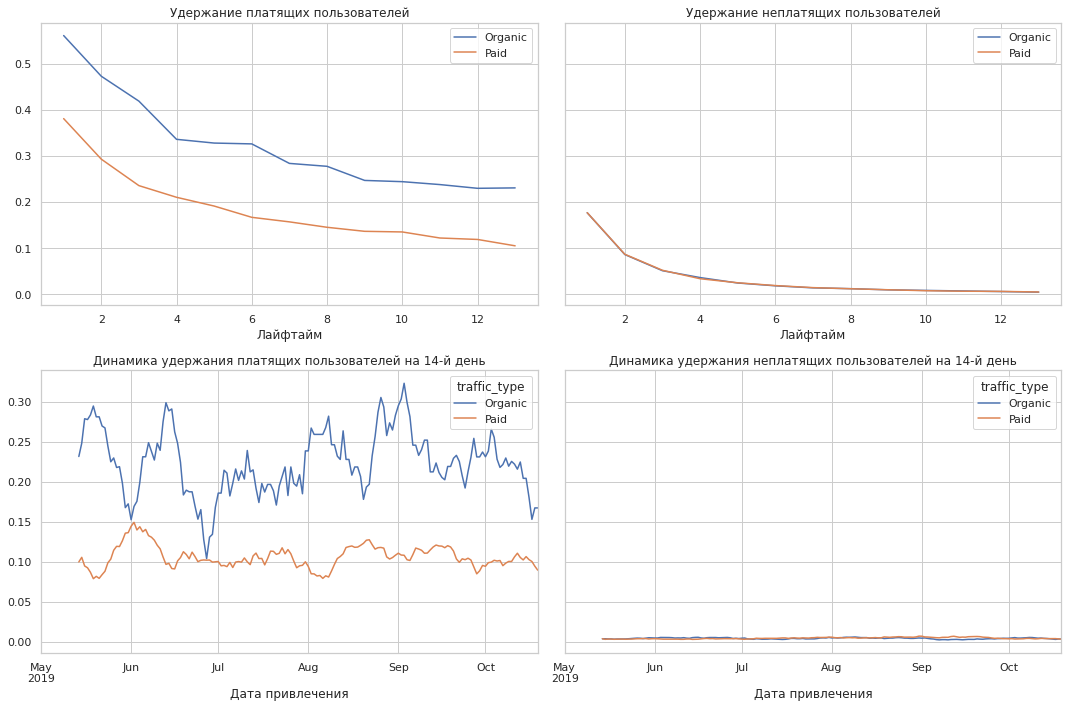

In [85]:
# код ревьюера

retention_raw, retention, retention_history = get_retention2(
    profiles_with_cac.rename(columns={'is_payer': 'payer'}), visits, observation_date, horizon_days, dimensions=['traffic_type']
)

plot_retention2(retention, retention_history, horizon_days, window=14)

Conversion Rate

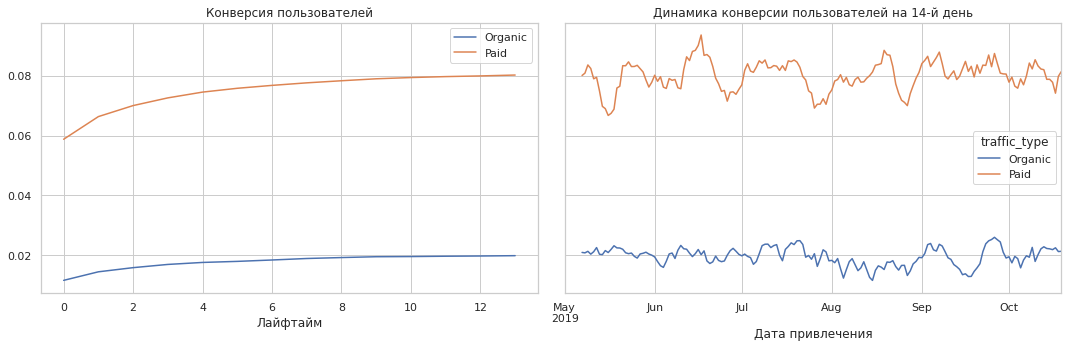

In [86]:
# Функция Conversion Rate,  разделим на типы трафика
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_with_cac, orders, observation_date, horizon_days, dimensions=['traffic_type'])

plot_conversion(conversion, conversion_history, horizon_days) 

Из анализа графика конверсии видно, что пользователи хорошо конвертируются в приложении, особенно из платных каналов привлечения. Однако, чтобы окупить затраты, важно отметить, что удержание платящих пользователей значительно лучше у органических источников трафика. На 14-й день удержание платящих пользователей из органических источников демонстрирует значительный разброс, чего нельзя сказать о пользователях из платных каналов

#### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

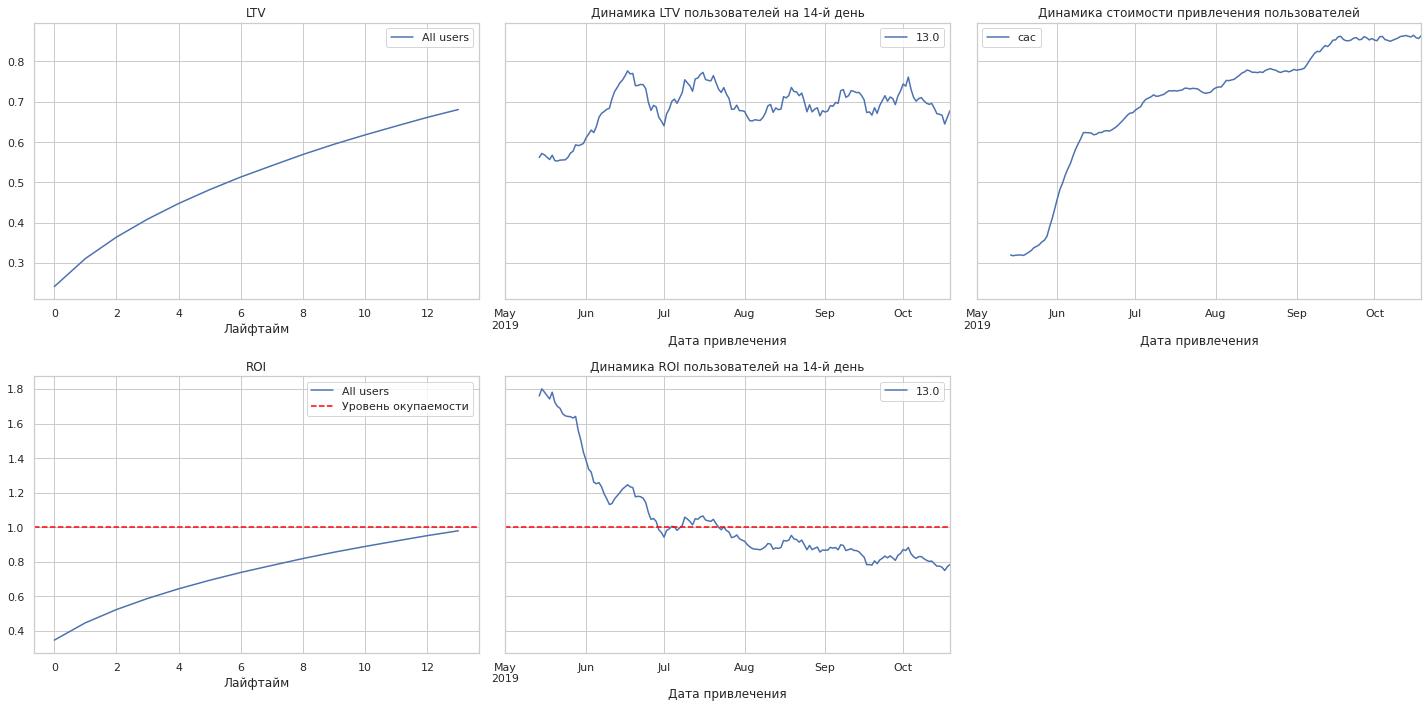

In [87]:
# Функция для расчета LTV, CAC и ROI. Тут уже будем смотреть только на пользователей из платных источников
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_with_cac, orders, observation_date, horizon_days, dimensions=[]
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Наши затраты не оправдываются: если на 14-й день мая и июня мы еще достигали окупаемости, то после этого начали наблюдаться значительные убытки.

Стоимость привлечения пользователя по месяцам стабильно растет.

LTV по-прежнему подвержен сезонным колебаниям, но остается стабильным

#### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

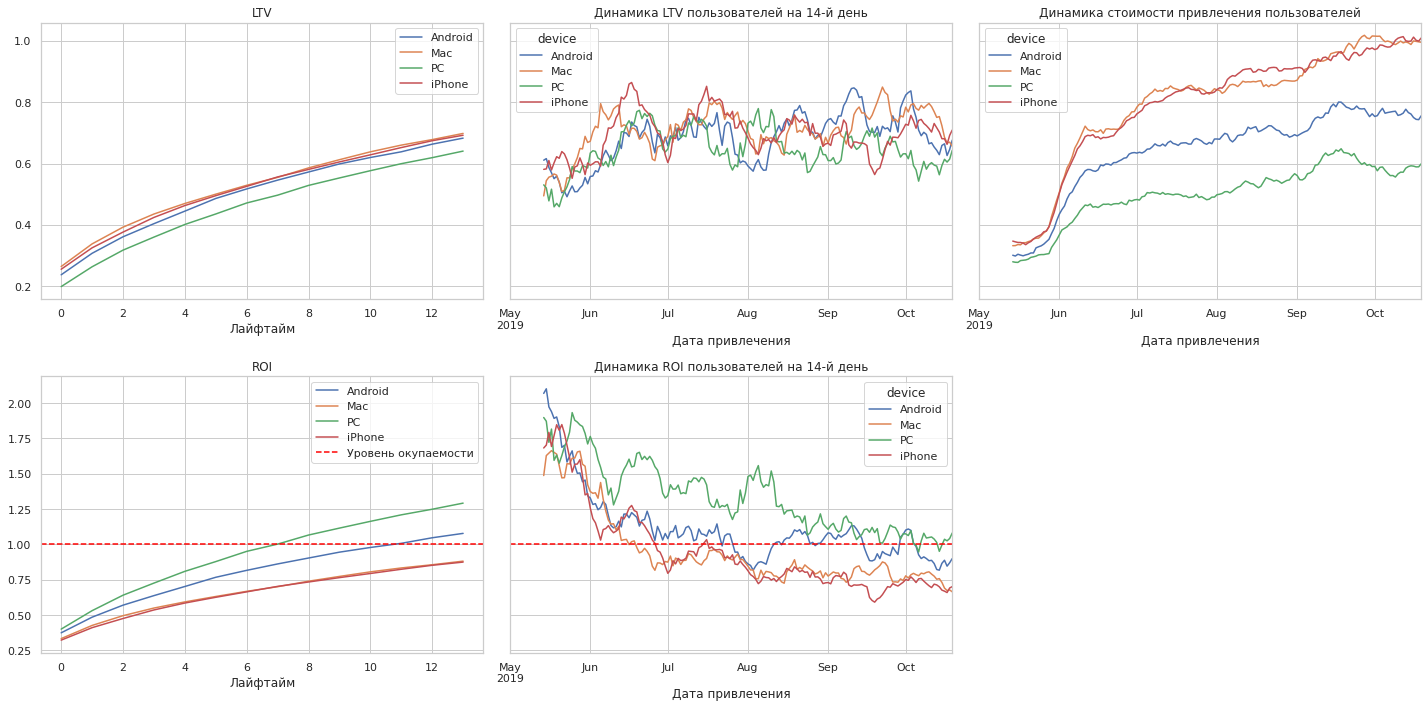

In [88]:
# Функция для расчета LTV, CAC и ROI. Тут уже будем смотреть только на пользователей из платных источников
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_with_cac, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Наши затраты не оправдываются: хотя на 14-й день мая и июня мы немного компенсировали затраты по разным устройствам, начиная с этого момента мы начали быстро получать убытки. На 12-й день затраты на привлечение пользователей через ПК начинают окупаться. Стоимость привлечения пользователя растет постоянно, особенно заметен рост для iPhone и Android. LTV по-прежнему подвержен сезонным колебаниям, но остается стабильным

#### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

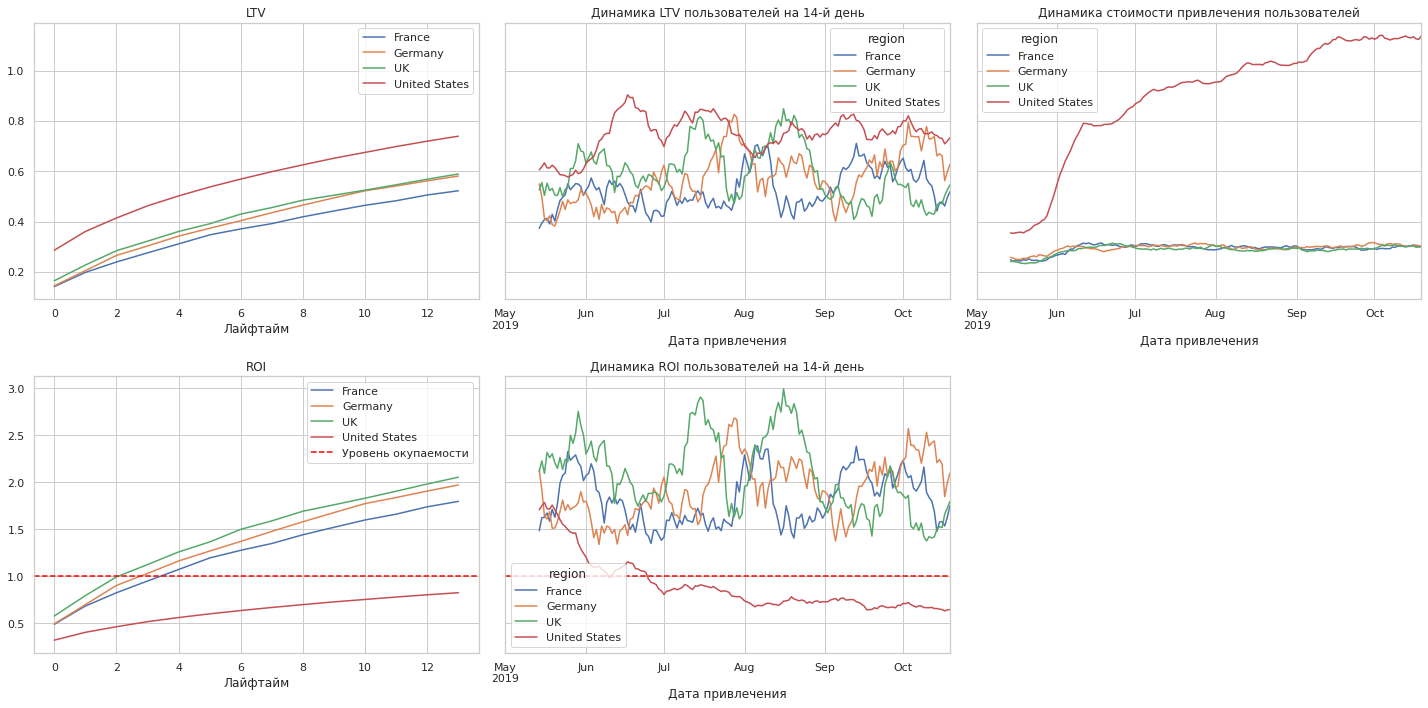

In [89]:
# Функция для расчета LTV, CAC и ROI. Тут уже будем смотреть только на пользователей из платных источников
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_with_cac, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Наши затраты не оправдываются только в США. Расходы на привлечение пользователей для США показывают постоянный рост по месяцам, в то время как в других странах после июня они остаются почти на одинаковом уровне. LTV продолжает подвергаться сезонным колебаниям, но остаётся стабильным

#### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

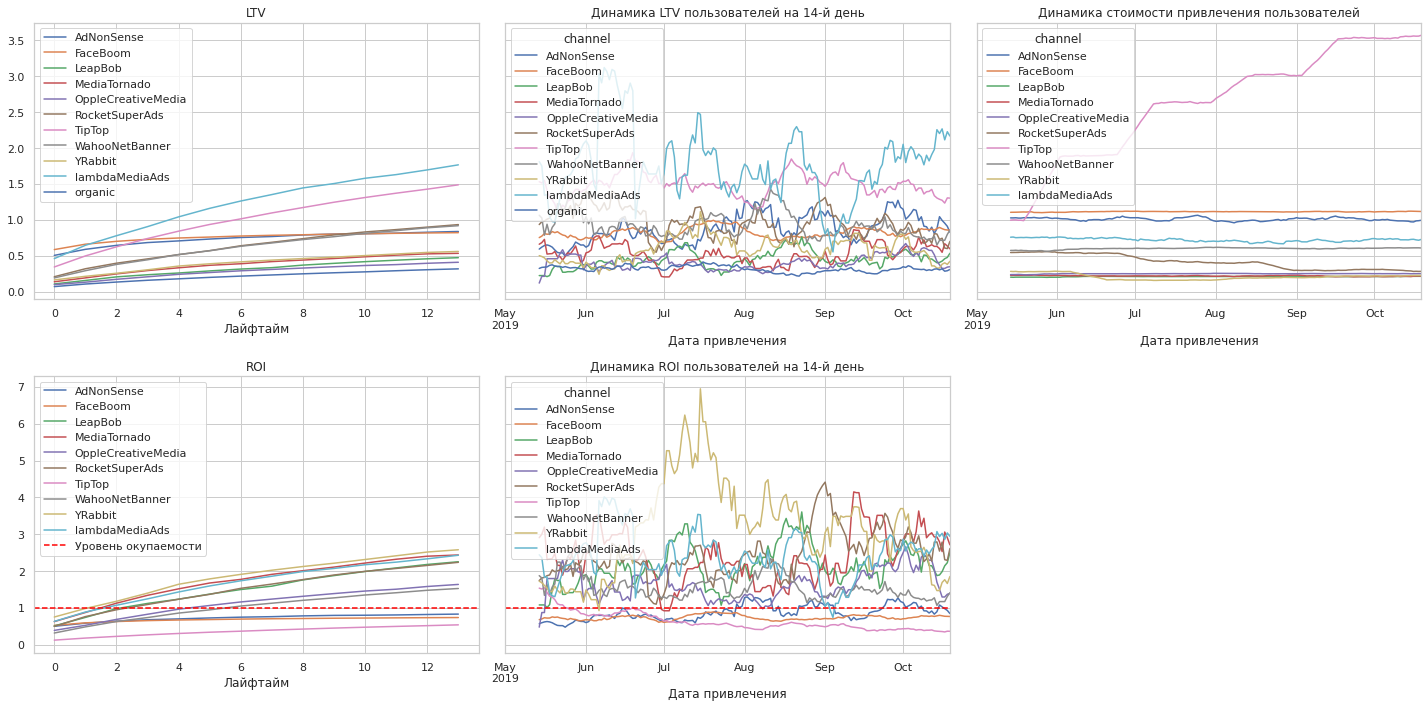

In [90]:
# Функция для расчета LTV, CAC и ROI. Тут уже будем смотреть только на пользователей из платных источников
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_with_cac, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Наши затраты не оправдываются для источников, на которые мы тратим больше всего денег, таких как TipTop и FaceBoom. Также не оправдываются затраты на AdNonSense. Для остальных источников окупаемость начинается с 4-5 дня.

Стоимость привлечения пользователя по месяцам остаётся стабильной (практически не изменяется), за исключением источника TipTop, где она постоянно растёт.

LTV по-прежнему подвержен сезонности, но остаётся стабильным.

### Заключение

**В процессе загрузки файлов было создано три датасета, в которых не обнаружены явные дубликаты или пропущенные значения. Были произведены следующие изменения в типах данных:**
- Преобразование строк с временными метками и датами в формат даты и времени.
- Преобразование числовых значений в строки для ID пользователей.

**Кроме того, все названия столбцов были приведены к нижнему регистру, а пробелы заменены на подчеркивания.**
- Минимальная дата привлечения пользователей составляет 2019-05-01, а максимальная — 2019-10-27.

**По странам:**
- Приложение охватывает следующие страны: 'United States', 'UK', 'France', 'Germany'.
- Наибольшее количество пользователей приходит из United States (100002), где также наибольшее число платящих пользователей (6902) с долей 6.9%.
- Наименьшее число пользователей из Germany (14981), количество платящих пользователей — 616, доля — 4.1%.

**По устройствам:**
- Приложение используется на следующих устройствах: 'iPhone', 'Android', 'Mac', 'PC'.
- Наибольшее количество пользователей — на устройствах iPhone (54479), где также наибольшее количество платящих пользователей (3382) с долей 6.2%.
- Наименьшее число пользователей из устройств PC (30455), количество платящих — 1537, доля — 5%.

**По источникам:**
- Приложение привлекает пользователей из следующих источников: 'FaceBoom', 'TipTop', 'Organic', 'WahooNetBanner', 'AdNonSense', 'RocketSuperAds', 'LeapBob', 'OppleCreativeMedia', 'lambdaMediaAds', 'YRabbit', 'MediaTornado'.

- Наибольшее количество пользователей приходит из источника Organic (56439), но наибольшее число платящих пользователей (3557) из FaceBoom, где доля составляет 12.2% (всего пользователей из этого источника 29144). Наименьшее число пользователей из источника MediaTornado (4364), количество платящих — 156, доля — 3.5%.

- На графиках видно, что наибольшие расходы приходится на TipTop и FaceBoom, которые многократно превышают затраты по другим источникам. Эти расходы также увеличиваются по мере времени. В общем, реклама не окупается из-за использования убыточных источников трафика в разных странах.

**Конверсии и удержание:**
    Из графика конверсии видно, что пользователи конвертируются в приложении довольно хорошо. Платные каналы показывают наилучшие результаты, но для платящих пользователей удержание у органических источников лучше. На 14-й день наблюдается значительный разброс удержания платящих пользователей из органических источников, чего нельзя сказать о платных каналах.

**Окупаемость в целом:**
    Затраты на рекламу не окупаются. Хотя в мае и июне на 14-й день было небольшое покрытие затрат для разных устройств, далее начался резкий убыток. На 12-й день начинают окупаться затраты для устройств PC. Стоимость привлечения пользователя ежемесячно растет, особенно для iPhone и Android. LTV по-прежнему подвержен сезонным колебаниям, но остается стабильным.

**Окупаемость по устройствам:**
    Затраты не окупаются; хотя в мае и июне на 14-й день было небольшое покрытие затрат, далее начался значительный убыток. На 12-й день начинают окупаться затраты для устройств PC. Стоимость привлечения пользователя ежемесячно растет, особенно для iPhone и Android. LTV по-прежнему подвержен сезонности, но остается стабильным.

**Окупаемость по странам:**
    Затраты не окупаются только в США. Стоимость привлечения пользователя ежемесячно растет для США, в то время как для других стран с июня она остается почти постоянной. LTV по-прежнему подвержен сезонным колебаниям, но остается стабильным.

**Окупаемость по источникам:**
    Затраты не окупаются для источников, на которые мы тратим больше всего денег — TipTop и FaceBoom, а также для AdNonSense. Окупаемость начинается с 4-5 дня для остальных источников. Стоимость привлечения пользователя ежемесячно остается стабильной, за исключением TipTop, где она постоянно растет. LTV по-прежнему подвержен сезонности, но остается стабильным.

**Рекомендации:**
    Окупаемость начинается с 2-5 дня. AdNonSense явно не окупается, рекомендуется временно приостановить рекламу из этого источника и пересмотреть подходы к нему. Возможно, стоит начать с минимальных сумм для тестирования рекламных стратегий, чтобы избежать общего ухудшения окупаемости. По устройствам нет особых ограничений, окупаемость начинается с 5-6 дня. Стоимость привлечения пользователя по месяцам стабильна, как и для источников и устройств. LTV по-прежнему подвержен сезонным колебаниям, особенно выраженным для источника lambdaMediaAds и устройств Apple.

**Предполагаемые причины:**
    Не учтены особенности американского рынка и высокая конкуренция.
    Неправильная модель оптимизации рекламного трафика. Возможно, проблема в передаче данных в рекламные кабинеты, что мешает оптимизации кампаний и привлечению конвертирующей аудитории.
    Плохая оптимизация рекламных кампаний под различные источники трафика. Возможно, необходимо чаще обновлять рекламные баннеры или учитывать особенности рынка для каждого источника.